In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def repeatedly_apply(matrix, sequence_length, perturb=0.0, nonlin=None):
    """Generates a random vector and repeatedly applies matrix to it
    sequence_length times, returning the result as an n x sequence_length+1 matrix.
    Optionally perturbs with noise at each stage to simulate an RNN"""
    vector = np.random.normal(size=(matrix.shape[0], 1))
    results = [vector]
    # there's probably a nice functional way to do this
    for _ in range(sequence_length):
        results.append(np.dot(matrix, results[-1]))
        if perturb > 0.0:
            results[-1] += np.random.normal(scale=perturb, size=vector.shape)
        if nonlin:
            results[-1] = nonlin(results[-1])
    return np.hstack(results)

(-0.5, 500.5, 99.5, -0.5)

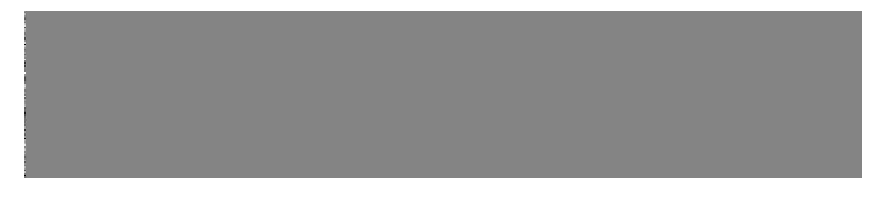

In [79]:
mat = np.random.normal(scale=0.01, size=(100, 100))
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

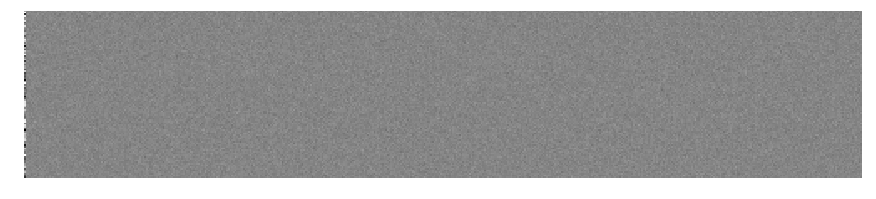

In [80]:
mat = np.random.normal(scale=0.01, size=(100, 100))
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

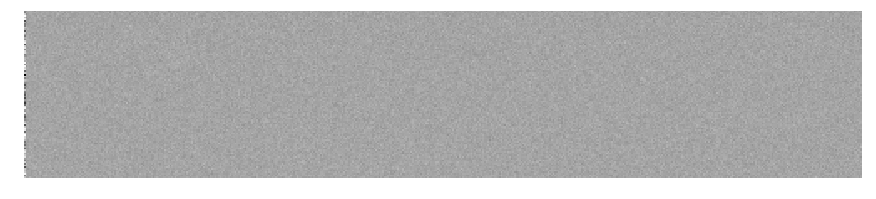

In [81]:
mat = np.random.normal(scale=0.01, size=(100, 100))
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

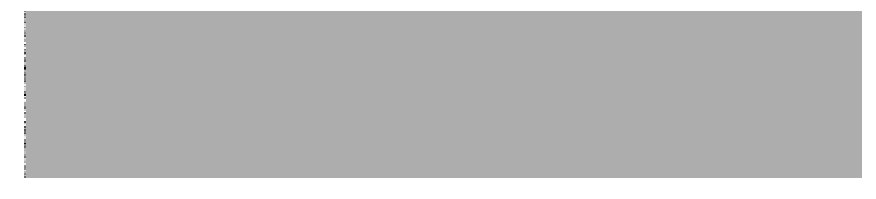

In [82]:
# divide matrix by the frobenius norm
mat = np.random.normal(scale=1.0, size=(100, 100))
mat /= np.sum(mat ** 2)
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

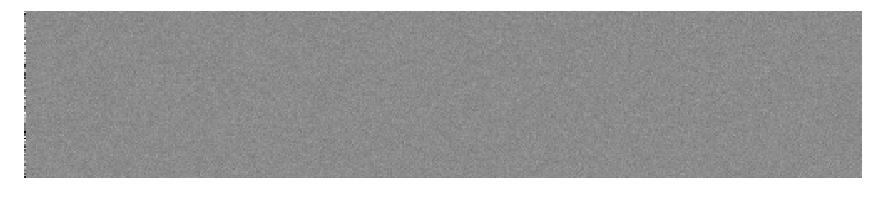

In [84]:
mat = np.random.normal(scale=0.01, size=(100, 100))
mat /= np.sum(mat ** 2)
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

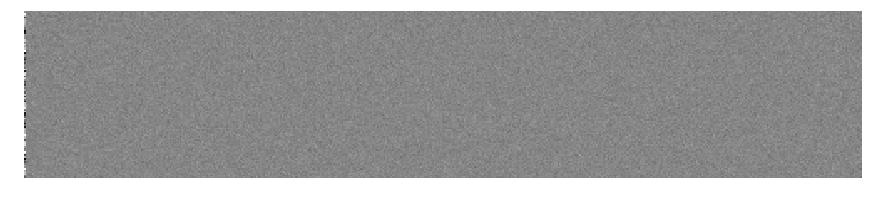

In [85]:
mat = np.random.normal(scale=0.01, size=(100, 100))
mat /= np.sum(mat ** 2)
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

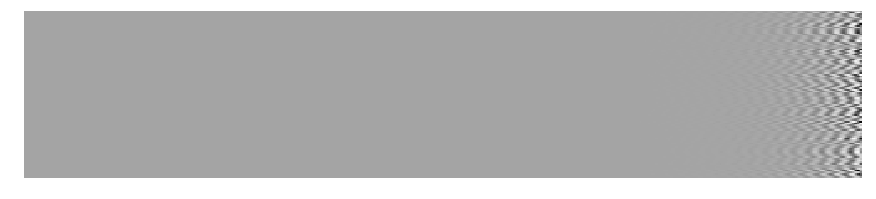

In [86]:
# divide by a fraction of the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (0.5 * np.abs(svs[0]))
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

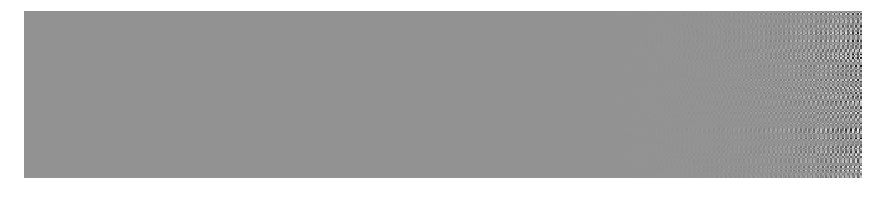

In [87]:
# divide by a fraction of the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (0.5 * np.abs(svs[0]))
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

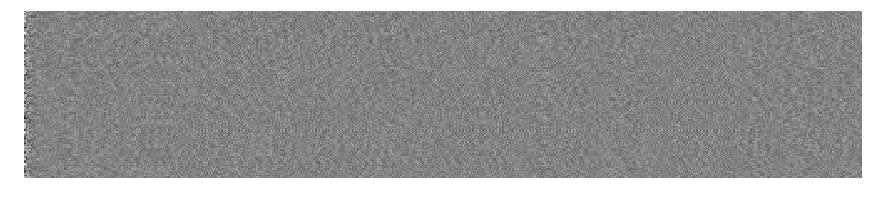

In [88]:
# divide by a fraction of the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (0.5 * np.abs(svs[0]))
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

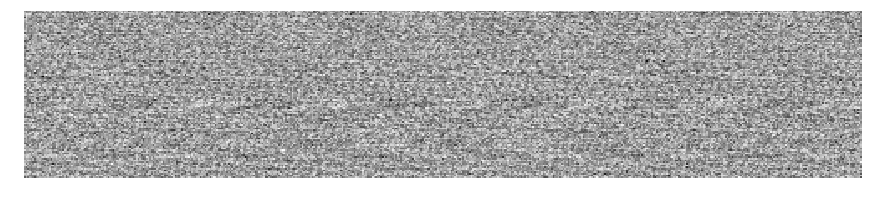

In [89]:
# make mat orthonormal
mat = np.random.normal(scale=1.0, size=(100, 100))
mat, _, _ = np.linalg.svd(mat)
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

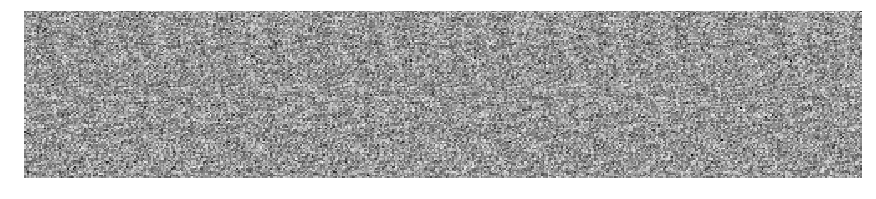

In [90]:
# make mat orthonormal
mat = np.random.normal(scale=1.0, size=(100, 100))
mat, _, _ = np.linalg.svd(mat)
results = repeatedly_apply(mat, 500, perturb=0.0)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

(-0.5, 500.5, 99.5, -0.5)

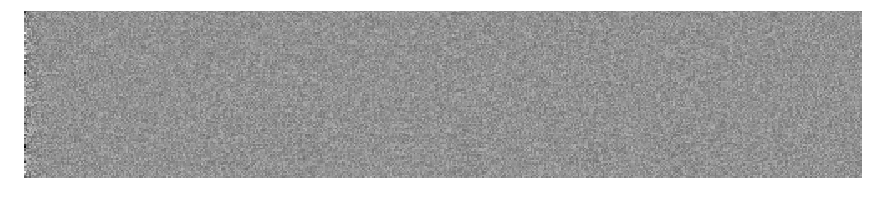

In [91]:
# make mat orthonormal
mat = np.random.normal(scale=1.0, size=(100, 100))
mat, _, _ = np.linalg.svd(mat)
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(15,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')